In [22]:
%matplotlib inline

In [23]:
import torch
import torchvision
import torchvision.transforms as transforms

In [24]:
# LOADS CIFAR10 images which are 32 x 32 x 3 RGB images
# iter(trainloader/testloader) are iterables that come in pairs (image, label)

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)


testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Let us show some of the training images, for fun.



In [25]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # in features --> flattened 32 x 32 x 3 image, out features = label (0,1,..., 9), use bias 
        self.linear = nn.Linear(3072, 10, bias=True)

    def forward(self, x):

        return self.linear(x)


net = Net()

# Choose Hyperparameters

In [26]:
num_epochs = 12 # number of epochs to train for
momentum = 0.9 # momentum for Stochastic Gradient Descent
lr = 0.001 # learning rate (eta) for gradient descent

# 3. Define a Loss function and optimizer

Let's use a Classification Cross-Entropy loss and SGD with momentum.



In [27]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=momentum)

# 4. Train the network


This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.



In [28]:
def calc_accuracy(dataloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            images = images.view(4, -1)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    return 100.0 * correct / total

In [29]:
all_train_accuracies = []
all_test_accuracies = []
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.view(4, -1)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
    
    train_accuracy = calc_accuracy(trainloader)
    test_accuracy = calc_accuracy(testloader)
    print('END OF EPOCH ', epoch + 1, ': train accuracy = ', train_accuracy )
    
    all_train_accuracies.append(train_accuracy)
    all_test_accuracies.append(test_accuracy)

print('Finished Training')

[1,  2000] loss: 2.187
[1,  4000] loss: 2.171
[1,  6000] loss: 2.149
[1,  8000] loss: 2.136
[1, 10000] loss: 2.147
[1, 12000] loss: 2.140
END OF EPOCH  1 : train accuracy =  35.616
[2,  2000] loss: 2.057
[2,  4000] loss: 2.090
[2,  6000] loss: 2.108
[2,  8000] loss: 2.092
[2, 10000] loss: 2.129
[2, 12000] loss: 2.115
END OF EPOCH  2 : train accuracy =  35.334
[3,  2000] loss: 2.020
[3,  4000] loss: 2.069
[3,  6000] loss: 2.106
[3,  8000] loss: 2.084
[3, 10000] loss: 2.121
[3, 12000] loss: 2.133
END OF EPOCH  3 : train accuracy =  38.334
[4,  2000] loss: 2.001
[4,  4000] loss: 2.048
[4,  6000] loss: 2.050
[4,  8000] loss: 2.108
[4, 10000] loss: 2.093
[4, 12000] loss: 2.080
END OF EPOCH  4 : train accuracy =  35.264
[5,  2000] loss: 1.998
[5,  4000] loss: 2.026
[5,  6000] loss: 2.072
[5,  8000] loss: 2.092
[5, 10000] loss: 2.080
[5, 12000] loss: 2.066
END OF EPOCH  5 : train accuracy =  37.352
[6,  2000] loss: 1.994
[6,  4000] loss: 2.077
[6,  6000] loss: 2.057
[6,  8000] loss: 2.085
[6,

# Plot accuracy over time






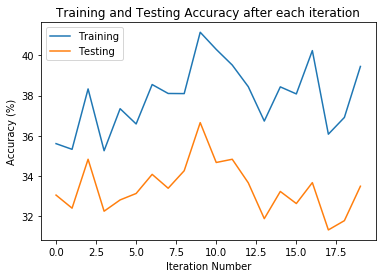

In [30]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.plot(all_train_accuracies)
plt.plot(all_test_accuracies)
plt.title('Training and Testing Accuracy after each iteration')
plt.xlabel('Iteration Number')
plt.ylabel('Accuracy (%)')
plt.legend(['Training', 'Testing'])
plt.show()